2024

Baghdad, Iraq March 2024

In [32]:
import pandas as pd 
df = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, March 24.csv")
df
#Drop the unnecessary columns
df = df.drop(columns=["location_id", "datetimeUtc", "location_name", "country_iso", "isMobile", "isMonitor", "owner_name", "provider"])
df

,parameter,value,unit,datetimeLocal,timezone,latitude,longitude
0,pm25,41,µg/m³,2024-03-05T23:00:00+03:00,Asia/Baghdad,33.3128,44.3615
1,pm25,34,µg/m³,2024-03-06T00:00:00+03:00,Asia/Baghdad,33.3128,44.3615
2,pm25,36,µg/m³,2024-03-06T01:00:00+03:00,Asia/Baghdad,33.3128,44.3615
3,pm25,32,µg/m³,2024-03-06T02:00:00+03:00,Asia/Baghdad,33.3128,44.3615
4,pm25,23,µg/m³,2024-03-06T03:00:00+03:00,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...,...
581,pm25,72,µg/m³,2024-03-30T23:00:00+03:00,Asia/Baghdad,33.3128,44.3615
582,pm25,44,µg/m³,2024-03-31T00:00:00+03:00,Asia/Baghdad,33.3128,44.3615
583,pm25,28,µg/m³,2024-03-31T01:00:00+03:00,Asia/Baghdad,33.3128,44.3615
584,pm25,25,µg/m³,2024-03-31T02:00:00+03:00,Asia/Baghdad,33.3128,44.3615


In [33]:
# Convert the datetimeLocal column to pandas datetime format
df["datetimeLocal"] = df["datetimeLocal"].str.rstrip("3:00")
df["datetimeLocal"] = df["datetimeLocal"].str.rstrip("+")
df['datetimeLocal'] = pd.to_datetime(df['datetimeLocal']) 
df = df.set_index('datetimeLocal') # Index to be used as x in chart/graph
df

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-03-05 23:00:00,pm25,41,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-06 00:00:00,pm25,34,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-06 01:00:00,pm25,36,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-06 02:00:00,pm25,32,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-06 03:00:00,pm25,23,µg/m³,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...
2024-03-30 23:00:00,pm25,72,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-31 00:00:00,pm25,44,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-31 01:00:00,pm25,28,µg/m³,Asia/Baghdad,33.3128,44.3615


In [34]:
#Exploratory data analysis and visualisation
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [35]:
df.describe() #March BI

,value,latitude,longitude
count,586.000000,586.0000,5.860000e+02
mean,35.650171,33.3128,4.436150e+01
std,19.341965,0.0000,1.422300e-14
min,5.000000,33.3128,4.436150e+01
25%,21.000000,33.3128,4.436150e+01
50%,32.000000,33.3128,4.436150e+01
75%,45.000000,33.3128,4.436150e+01
max,140.000000,33.3128,4.436150e+01


In [36]:
df.isnull().sum()#Checks for null entries

parameter    0
value        0
unit         0
timezone     0
latitude     0
longitude    0
dtype: int64

In [37]:
df.nunique()#Counts the number of unique enetries 

parameter     1
value        83
unit          1
timezone      1
latitude      1
longitude     1
dtype: int64

In [38]:
df.dtypes

parameter     object
value          int64
unit          object
timezone      object
latitude     float64
longitude    float64
dtype: object

In [39]:
df.select_dtypes(include = 'number')

,value,latitude,longitude
datetimeLocal,,,
2024-03-05 23:00:00,41,33.3128,44.3615
2024-03-06 00:00:00,34,33.3128,44.3615
2024-03-06 01:00:00,36,33.3128,44.3615
2024-03-06 02:00:00,32,33.3128,44.3615
2024-03-06 03:00:00,23,33.3128,44.3615
...,...,...,...
2024-03-30 23:00:00,72,33.3128,44.3615
2024-03-31 00:00:00,44,33.3128,44.3615
2024-03-31 01:00:00,28,33.3128,44.3615


In [40]:
df.sort_values(by = 'value', ascending = False).head(10)

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-03-24 00:00:00,pm25,140,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-13 03:00:00,pm25,130,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-08 01:00:00,pm25,110,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-18 04:00:00,pm25,110,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-14 01:00:00,pm25,110,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-13 02:00:00,pm25,100,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-15 06:00:00,pm25,97,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-14 02:00:00,pm25,96,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-03-13 04:00:00,pm25,95,µg/m³,Asia/Baghdad,33.3128,44.3615


In [41]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


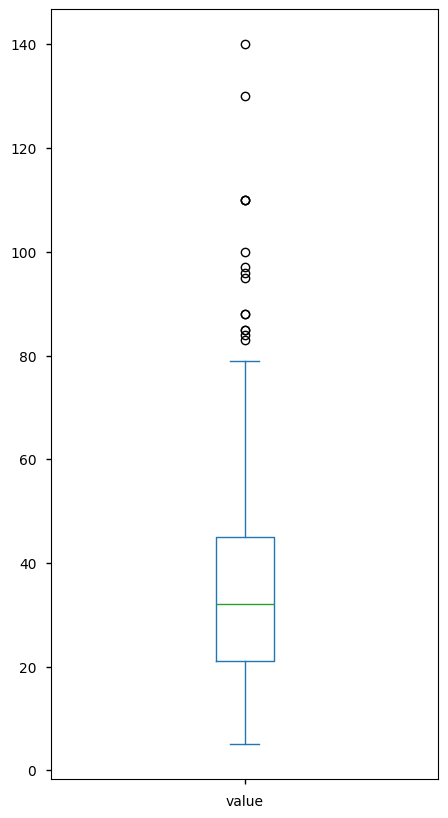

In [42]:
df['value'].plot(kind = 'box', figsize = (5,10))
plt.show()


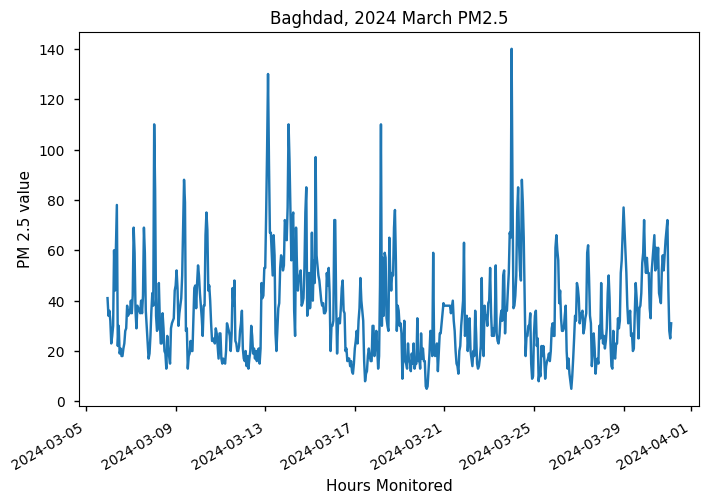

In [43]:
df['value'].plot(kind = 'line', title = 'Baghdad, 2024 March PM2.5', xlabel = 'Hours Monitored', ylabel = 'PM 2.5 value')
plt.style.use("seaborn-v0_8-notebook")
plt.show()

Baghdad, Iraq April 2024

In [44]:
import pandas as pd 
df_1 = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, April 24.csv")
df_1
#Drop the unnecessary columns
df_1 = df_1.drop(columns=["location_id", "datetimeUtc", "location_name", "country_iso", "isMobile", "isMonitor", "owner_name", "provider"])
df_1

,parameter,value,unit,datetimeLocal,timezone,latitude,longitude
0,pm25,62,µg/m³,2024-04-01T04:00:00+03:00,Asia/Baghdad,33.3128,44.3615
1,pm25,60,µg/m³,2024-04-01T05:00:00+03:00,Asia/Baghdad,33.3128,44.3615
2,pm25,58,µg/m³,2024-04-01T06:00:00+03:00,Asia/Baghdad,33.3128,44.3615
3,pm25,56,µg/m³,2024-04-01T07:00:00+03:00,Asia/Baghdad,33.3128,44.3615
4,pm25,55,µg/m³,2024-04-01T08:00:00+03:00,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...,...
686,pm25,55,µg/m³,2024-04-29T20:00:00+03:00,Asia/Baghdad,33.3128,44.3615
687,pm25,59,µg/m³,2024-04-29T21:00:00+03:00,Asia/Baghdad,33.3128,44.3615
688,pm25,40,µg/m³,2024-04-29T22:00:00+03:00,Asia/Baghdad,33.3128,44.3615
689,pm25,44,µg/m³,2024-04-29T23:00:00+03:00,Asia/Baghdad,33.3128,44.3615


In [45]:
# Convert the datetimeLocal column to pandas datetime format
df_1["datetimeLocal"] = df_1["datetimeLocal"].str.rstrip("3:00")
df_1["datetimeLocal"] = df_1["datetimeLocal"].str.rstrip("+")
df_1['datetimeLocal'] = pd.to_datetime(df_1['datetimeLocal']) 
df_1 = df_1.set_index('datetimeLocal') # Index to be used as x in chart/graph
df_1

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-04-01 04:00:00,pm25,62,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-01 05:00:00,pm25,60,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-01 06:00:00,pm25,58,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-01 07:00:00,pm25,56,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-01 08:00:00,pm25,55,µg/m³,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...
2024-04-29 20:00:00,pm25,55,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 21:00:00,pm25,59,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 22:00:00,pm25,40,µg/m³,Asia/Baghdad,33.3128,44.3615


In [46]:
#Exploratory data analysis and visualisation
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
df_1.describe() #April BI

,value,latitude,longitude
count,691.000000,691.0000,6.910000e+02
mean,46.687410,33.3128,4.436150e+01
std,47.255588,0.0000,7.110574e-15
min,8.000000,33.3128,4.436150e+01
25%,25.000000,33.3128,4.436150e+01
50%,36.000000,33.3128,4.436150e+01
75%,54.000000,33.3128,4.436150e+01
max,540.000000,33.3128,4.436150e+01


In [48]:
df_1.sort_values(by = 'value', ascending = False).head(10)

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-04-28 22:00:00,pm25,540,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 02:00:00,pm25,440,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 03:00:00,pm25,400,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 06:00:00,pm25,370,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 07:00:00,pm25,350,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 04:00:00,pm25,340,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 05:00:00,pm25,310,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-29 08:00:00,pm25,310,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-04-28 23:00:00,pm25,290,µg/m³,Asia/Baghdad,33.3128,44.3615


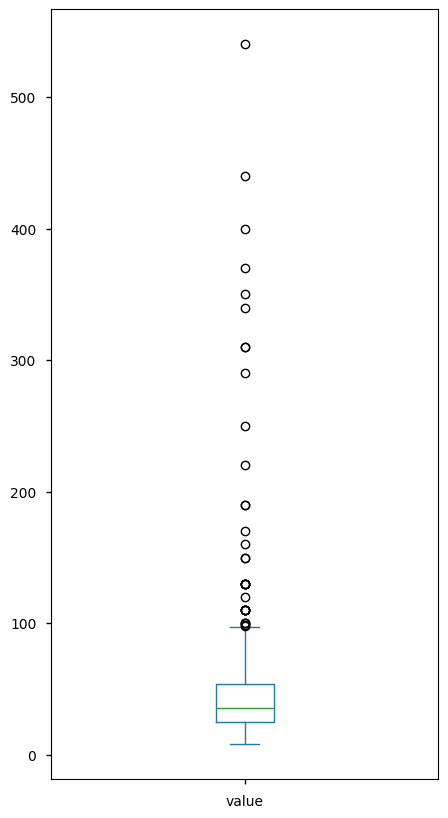

In [49]:
df_1['value'].plot(kind = 'box', figsize = (5,10))
plt.show()

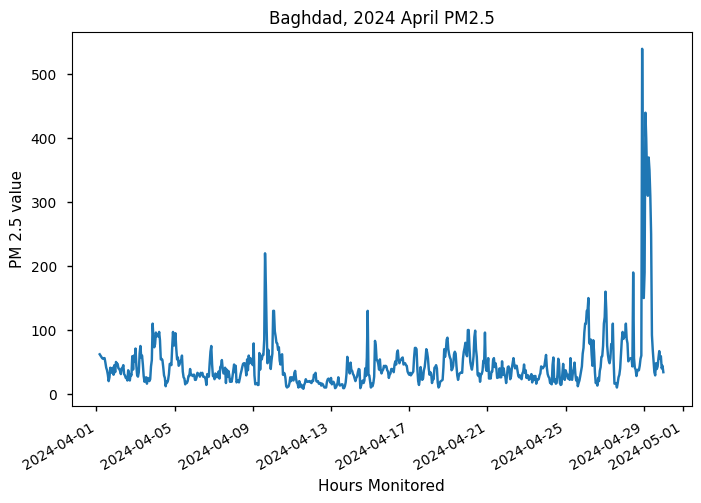

In [50]:
df_1['value'].plot(kind = 'line', title = 'Baghdad, 2024 April PM2.5', xlabel = 'Hours Monitored', ylabel = 'PM 2.5 value')
plt.style.use("seaborn-v0_8-notebook")
plt.show()

Baghdad, Iraq May 2024

In [51]:
import pandas as pd 
df_2 = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, May 24.csv")
df_2
#Drop the unnecessary columns
df_2 = df_2.drop(columns=["location_id", "datetimeUtc", "location_name", "country_iso", "isMobile", "isMonitor", "owner_name", "provider"])
df_2

,parameter,value,unit,datetimeLocal,timezone,latitude,longitude
0,pm25,31,µg/m³,2024-05-01T04:00:00+03:00,Asia/Baghdad,33.3128,44.3615
1,pm25,38,µg/m³,2024-05-01T05:00:00+03:00,Asia/Baghdad,33.3128,44.3615
2,pm25,43,µg/m³,2024-05-01T06:00:00+03:00,Asia/Baghdad,33.3128,44.3615
3,pm25,39,µg/m³,2024-05-01T07:00:00+03:00,Asia/Baghdad,33.3128,44.3615
4,pm25,66,µg/m³,2024-05-01T08:00:00+03:00,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...,...
710,pm25,91,µg/m³,2024-05-30T21:00:00+03:00,Asia/Baghdad,33.3128,44.3615
711,pm25,130,µg/m³,2024-05-30T22:00:00+03:00,Asia/Baghdad,33.3128,44.3615
712,pm25,130,µg/m³,2024-05-30T23:00:00+03:00,Asia/Baghdad,33.3128,44.3615
713,pm25,100,µg/m³,2024-05-31T00:00:00+03:00,Asia/Baghdad,33.3128,44.3615


In [52]:
# Convert the datetimeLocal column to pandas datetime format
df_2["datetimeLocal"] = df_2["datetimeLocal"].str.rstrip("3:00")
df_2["datetimeLocal"] = df_2["datetimeLocal"].str.rstrip("+")
df_2['datetimeLocal'] = pd.to_datetime(df_2['datetimeLocal']) 
df_2 = df_2.set_index('datetimeLocal') # Index to be used as x in chart/graph
df_2

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-05-01 04:00:00,pm25,31,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-01 05:00:00,pm25,38,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-01 06:00:00,pm25,43,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-01 07:00:00,pm25,39,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-01 08:00:00,pm25,66,µg/m³,Asia/Baghdad,33.3128,44.3615
...,...,...,...,...,...,...
2024-05-30 21:00:00,pm25,91,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-30 22:00:00,pm25,130,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-30 23:00:00,pm25,130,µg/m³,Asia/Baghdad,33.3128,44.3615


In [53]:
#Exploratory data analysis and visualisation
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [54]:
df_2.describe() #May BI

,value,latitude,longitude
count,715.000000,7.150000e+02,7.150000e+02
mean,47.011189,3.331280e+01,4.436150e+01
std,32.203613,7.110401e-15,1.422080e-14
min,7.000000,3.331280e+01,4.436150e+01
25%,28.000000,3.331280e+01,4.436150e+01
50%,38.000000,3.331280e+01,4.436150e+01
75%,55.000000,3.331280e+01,4.436150e+01
max,290.000000,3.331280e+01,4.436150e+01


In [55]:
df_2.sort_values(by = 'value', ascending = False).head(10)

,parameter,value,unit,timezone,latitude,longitude
datetimeLocal,,,,,,
2024-05-06 12:00:00,pm25,290,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-12 08:00:00,pm25,260,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-12 09:00:00,pm25,230,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-12 10:00:00,pm25,200,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-18 00:00:00,pm25,200,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-18 01:00:00,pm25,180,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-17 21:00:00,pm25,180,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-17 23:00:00,pm25,170,µg/m³,Asia/Baghdad,33.3128,44.3615
2024-05-18 05:00:00,pm25,170,µg/m³,Asia/Baghdad,33.3128,44.3615


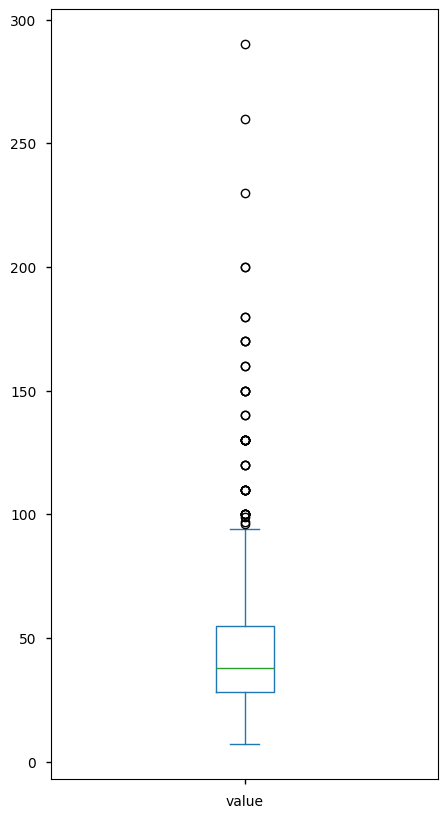

In [56]:
df_2['value'].plot(kind = 'box', figsize = (5,10))
plt.show()

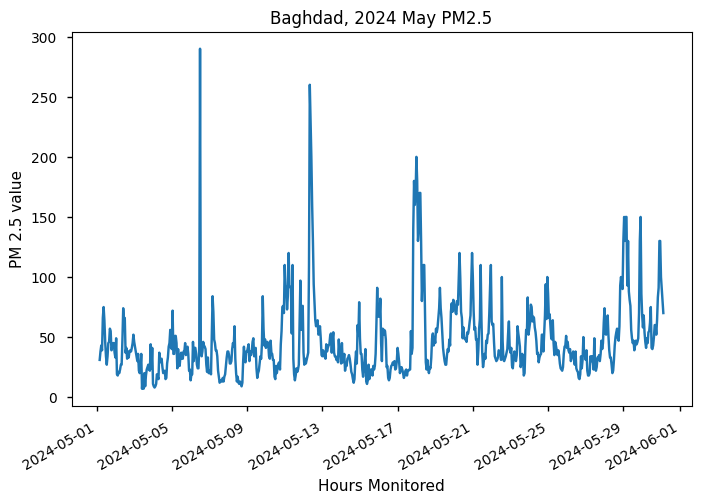

In [57]:
df_2['value'].plot(kind = 'line', title = 'Baghdad, 2024 May PM2.5', xlabel = 'Hours Monitored', ylabel = 'PM 2.5 value')
plt.style.use("seaborn-v0_8-notebook")
plt.show()

Month Comparison and Analysis

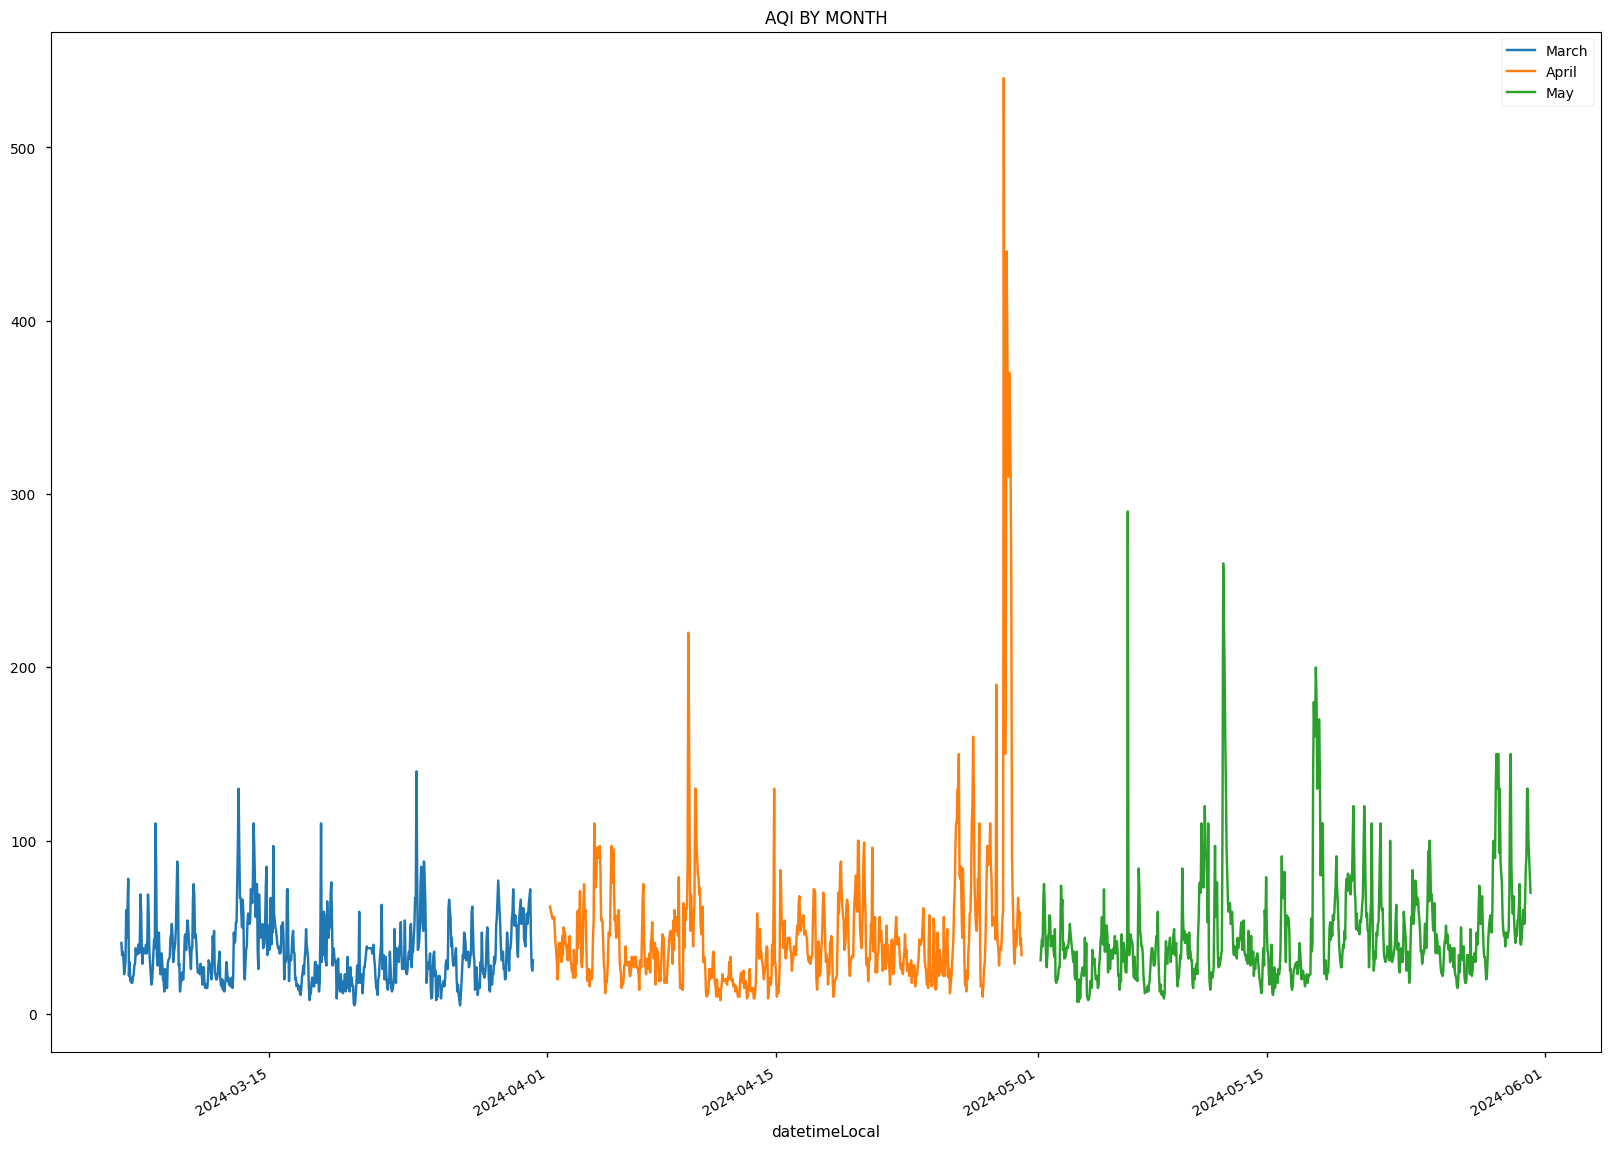

In [58]:

df['value'].plot(kind = 'line', label = "March", figsize= (20, 15))
df_1['value'].plot(kind = 'line', label = "April")
df_2['value'].plot(kind = 'line', label = "May")

plt.legend()
plt.title("AQI BY MONTH")
plt.show()


In [59]:
df_3 = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, March 24.csv")
df_4 = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, April 24.csv")
df_5 = pd.read_csv(r"C:/Users/HP/Desktop/Python/AQI Data/Baghdad Iraq/Baghdad Iraq, May 24.csv")

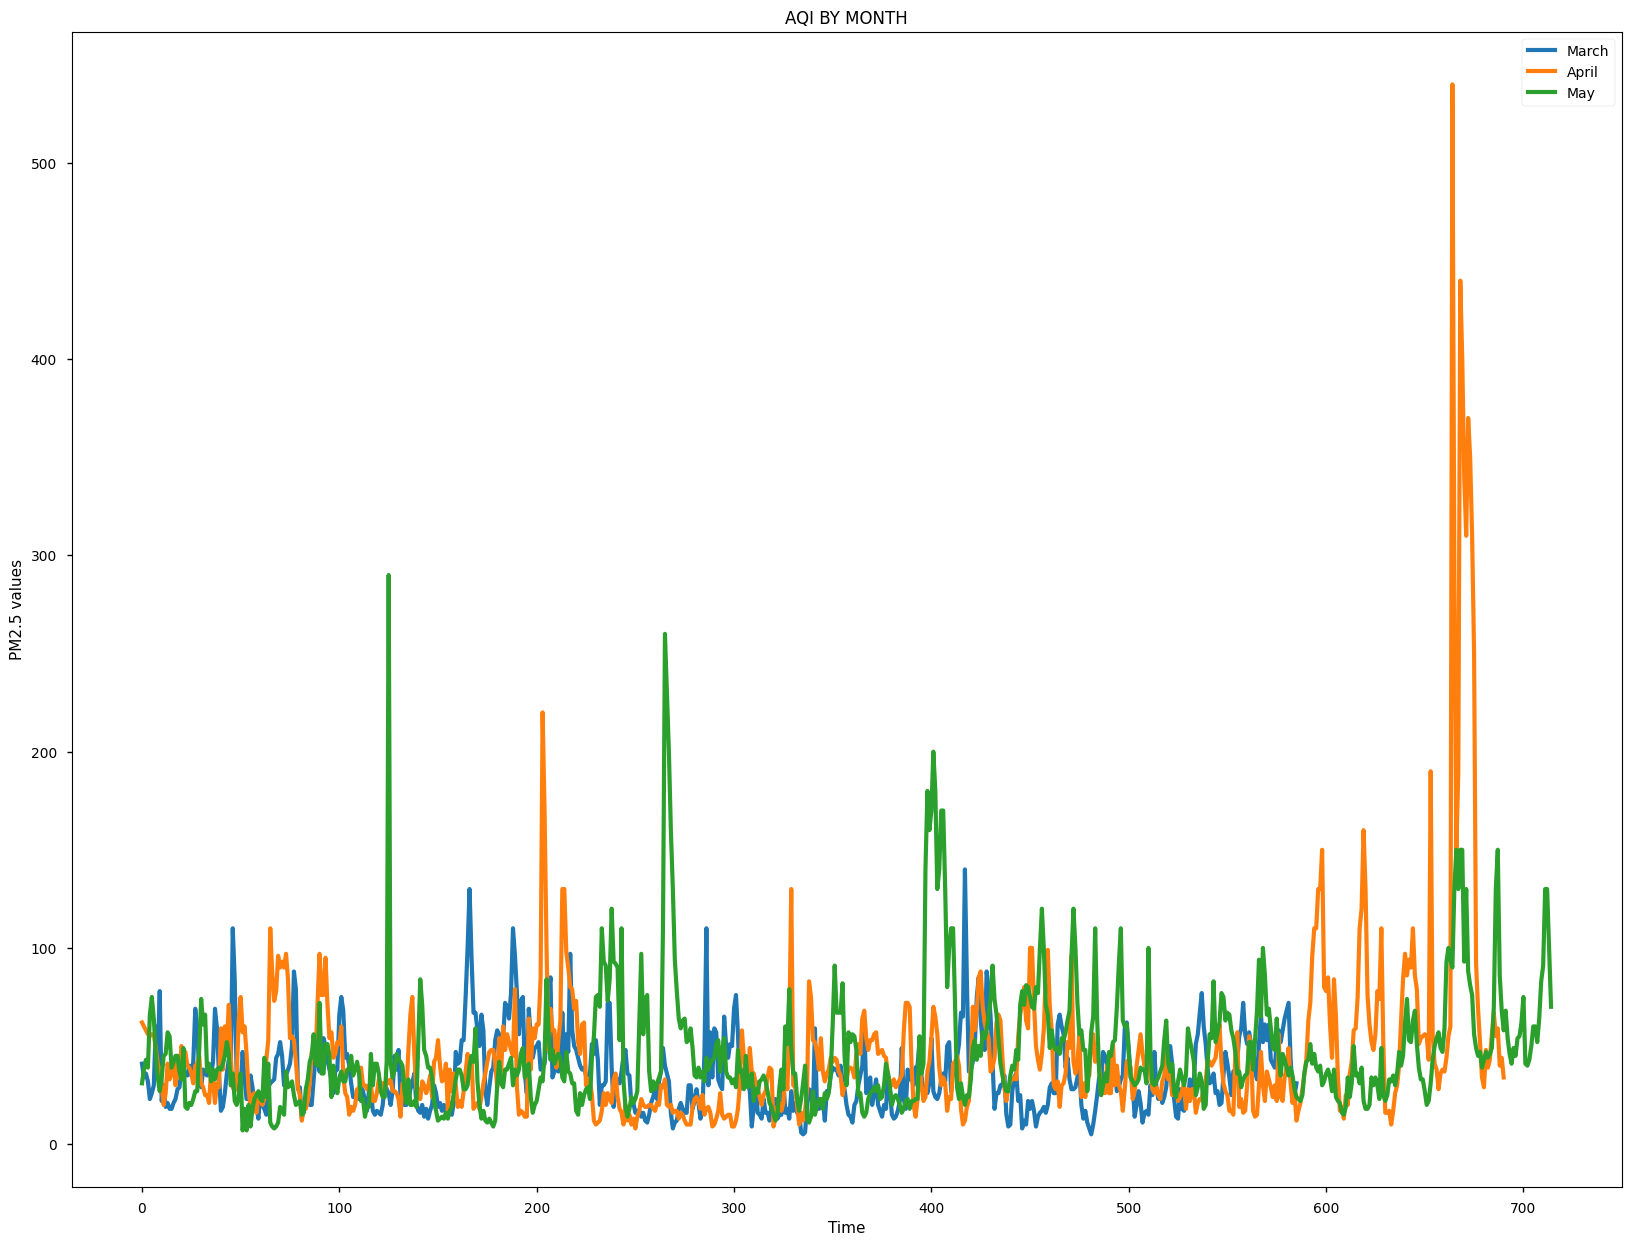

In [60]:
first_x = df_3['datetimeLocal']
first_values = df_3['value']
second_x = df_4['datetimeLocal']
second_values = df_4['value']
third_x = df_5['datetimeLocal']
third_values = df_5['value']

first_indexes = np.arange(len(first_x))
second_indexes = np.arange(len(second_x))
third_indexes = np.arange(len(third_x))

plt.figure(figsize=(20, 15))

plt.plot(first_indexes, first_values, label='March', lw = 3)
plt.plot(second_indexes, second_values, label='April', lw = 3)
plt.plot(third_indexes, third_values, label='May', lw = 3)


plt.legend()
plt.title("AQI BY MONTH")
plt.xlabel("Time")
plt.ylabel("PM2.5 values")
plt.show()

In [61]:
# Filter for PM2.5 measurements
pm25_march = df_3[df_3['parameter'] == 'pm25']
pm25_april = df_4[df_4['parameter'] == 'pm25']
pm25_may = df_5[df_5['parameter'] == 'pm25']

# Calculate summary statistics
stats_march = {
    'Month': 'March',
    'Statistic': 'Mean',
    'Value': pm25_march['value'].mean()
}
stats_march_median = {
    'Month': 'March',
    'Statistic': 'Median',
    'Value': pm25_march['value'].median()
}
stats_march_min = {
    'Month': 'March',
    'Statistic': 'Min',
    'Value': pm25_march['value'].min()
}
stats_march_max = {
    'Month': 'March',
    'Statistic': 'Max',
    'Value': pm25_march['value'].max()
}

stats_april = {
    'Month': 'April',
    'Statistic': 'Mean',
    'Value': pm25_april['value'].mean()
}
stats_april_median = {
    'Month': 'April',
    'Statistic': 'Median',
    'Value': pm25_april['value'].median()
}
stats_april_min = {
    'Month': 'April',
    'Statistic': 'Min',
    'Value': pm25_april['value'].min()
}
stats_april_max = {
    'Month': 'April',
    'Statistic': 'Max',
    'Value': pm25_april['value'].max()
}

stats_may = {
    'Month': 'May',
    'Statistic': 'Mean',
    'Value': pm25_may['value'].mean()
}
stats_may_median = {
    'Month': 'May',
    'Statistic': 'Median',
    'Value': pm25_may['value'].median()
}
stats_may_min = {
    'Month': 'May',
    'Statistic': 'Min',
    'Value': pm25_may['value'].min()
}
stats_may_max = {
    'Month': 'May',
    'Statistic': 'Max',
    'Value': pm25_may['value'].max()
}

# Create a DataFrame for summary statistics
summary_stats_df = pd.DataFrame([
    stats_march, stats_march_median, stats_march_min, stats_march_max,
    stats_april, stats_april_median, stats_april_min, stats_april_max,
    stats_may, stats_may_median, stats_may_min, stats_may_max
])
summary_stats_df


,Month,Statistic,Value
0,March,Mean,35.650171
1,March,Median,32.000000
2,March,Min,5.000000
3,March,Max,140.000000
4,April,Mean,46.687410
5,April,Median,36.000000
6,April,Min,8.000000
7,April,Max,540.000000
8,May,Mean,47.011189
9,May,Median,38.000000


Use this for describe (mean, mode, median, min, max)

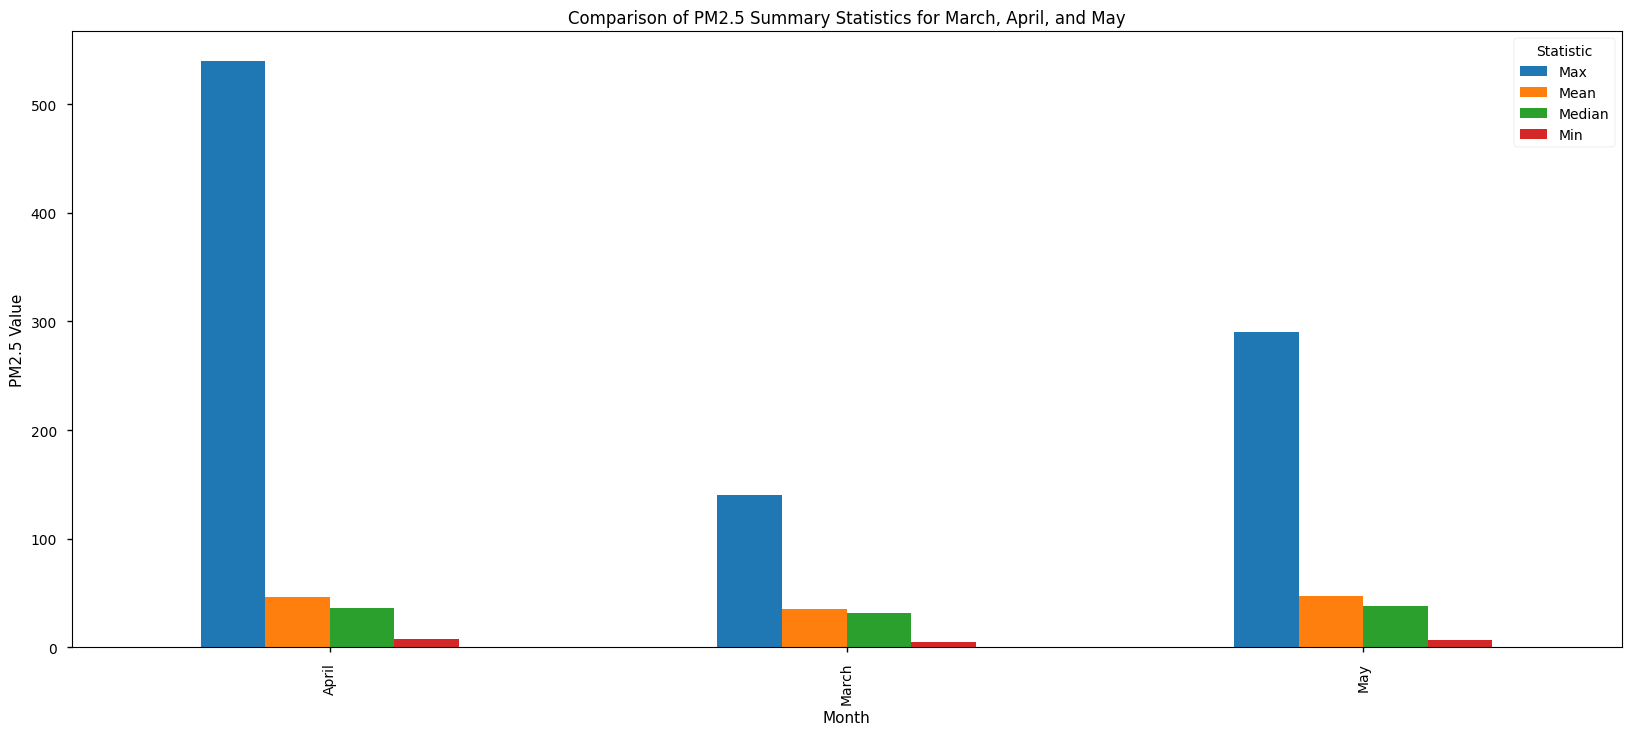

In [62]:
# Pivot the DataFrame for easier plotting
summary_stats_pivot = summary_stats_df.pivot(index='Month', columns='Statistic', values='Value')

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

summary_stats_pivot.plot(kind='bar', ax=ax)

# Set title and labels
ax.set_title('Comparison of PM2.5 Summary Statistics for March, April, and May')
ax.set_ylabel('PM2.5 Value')
ax.set_xlabel('Month')

# Add legend
ax.legend(title='Statistic')

# Show the plot
plt.show()